In [150]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
from statsmodels. tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import pickle

In [ ]:
df = pd.read_csv("AAP_data.csv")
df

,date,open,high,low,close,volume,Name
0,2013-02-08,78.34,79.7200,78.0100,78.90,1298137,AAP
1,2013-02-11,78.65,78.9100,77.2300,78.39,758016,AAP
2,2013-02-12,78.39,78.6300,77.5132,78.60,876859,AAP
3,2013-02-13,78.90,79.1300,77.8500,78.97,1038574,AAP
4,2013-02-14,78.66,79.7200,78.5850,78.84,1005376,AAP
...,...,...,...,...,...,...,...
1254,2018-02-01,116.24,118.8300,115.8300,117.29,760629,AAP
1255,2018-02-02,115.92,117.1800,113.1250,113.93,1092333,AAP
1256,2018-02-05,113.05,114.9700,109.8100,109.86,1281592,AAP
1257,2018-02-06,108.28,113.1100,106.7450,112.20,1240784,AAP


In [ ]:
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
df.set_index('date', inplace = True)
df.head()

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,78.34,79.72,78.0100,78.90,1298137,AAP
2013-02-11,78.65,78.91,77.2300,78.39,758016,AAP
2013-02-12,78.39,78.63,77.5132,78.60,876859,AAP
2013-02-13,78.90,79.13,77.8500,78.97,1038574,AAP
2013-02-14,78.66,79.72,78.5850,78.84,1005376,AAP


In [ ]:
df = df.drop(['Name'], axis=1)
df

,open,high,low,close,volume
date,,,,,
2013-02-08,78.34,79.7200,78.0100,78.90,1298137
2013-02-11,78.65,78.9100,77.2300,78.39,758016
2013-02-12,78.39,78.6300,77.5132,78.60,876859
2013-02-13,78.90,79.1300,77.8500,78.97,1038574
2013-02-14,78.66,79.7200,78.5850,78.84,1005376
...,...,...,...,...,...
2018-02-01,116.24,118.8300,115.8300,117.29,760629
2018-02-02,115.92,117.1800,113.1250,113.93,1092333
2018-02-05,113.05,114.9700,109.8100,109.86,1281592


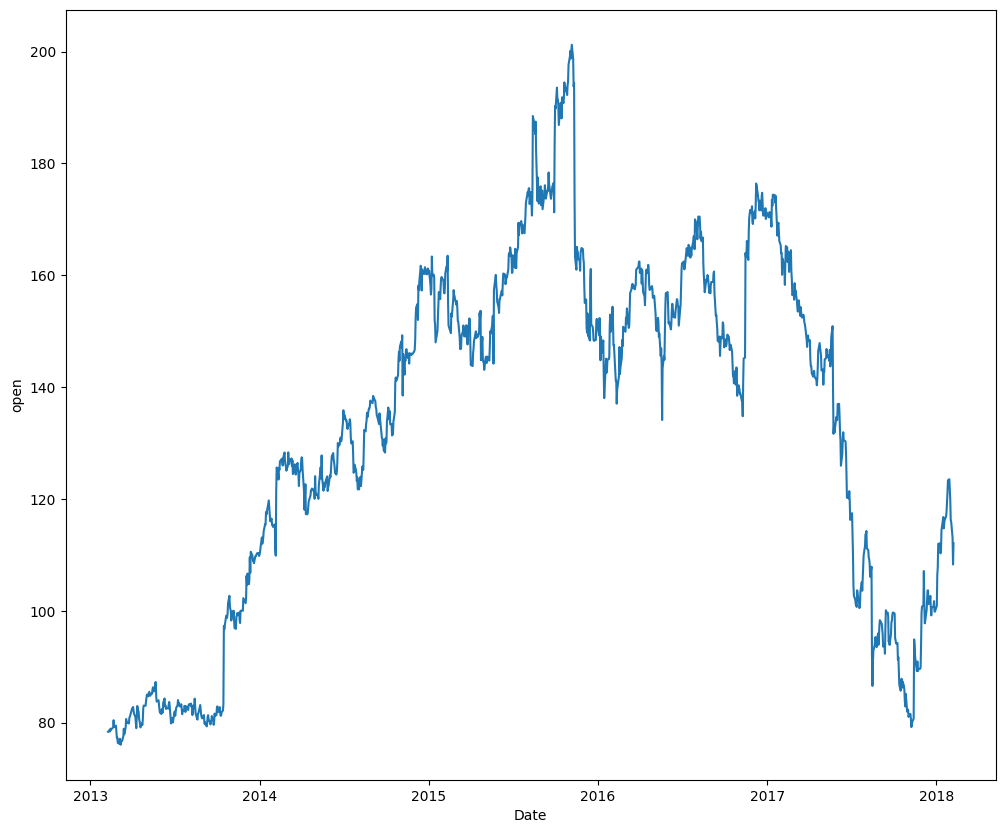

In [ ]:
plt.figure(figsize=(12, 10))
plt.xlabel("Date")
plt.ylabel("open")
plt.plot(df['open'])

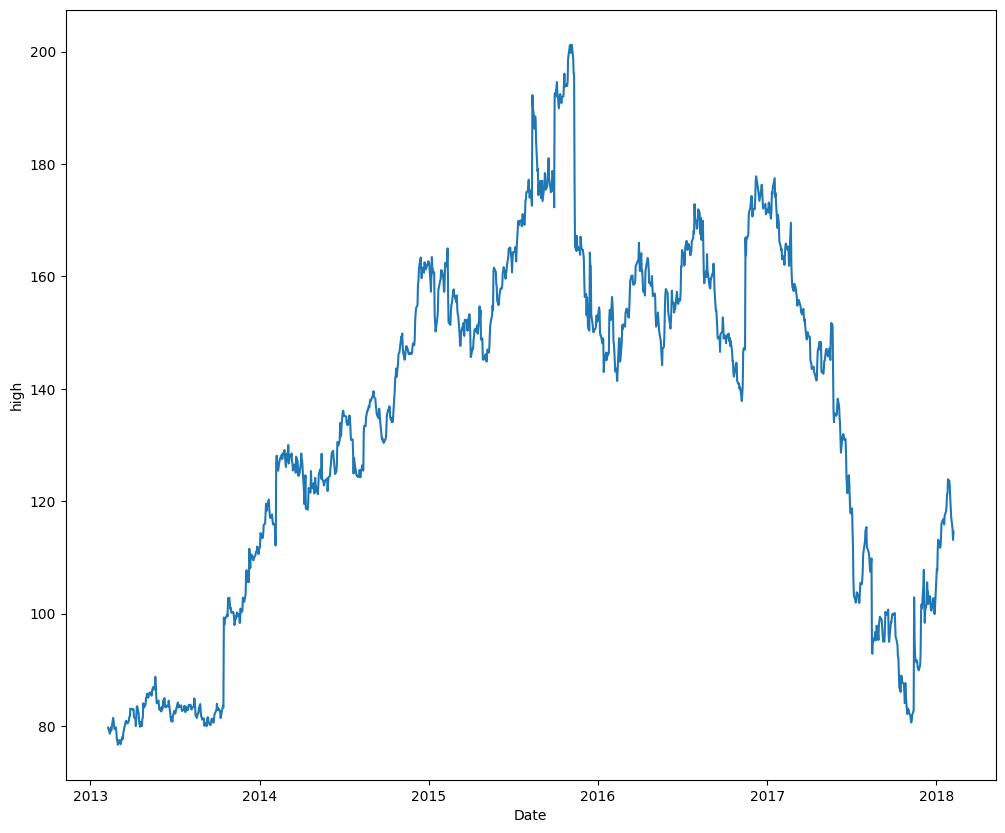

In [ ]:
plt.figure(figsize=(12, 10))
plt.xlabel("Date")
plt.ylabel("high")
plt.plot(df['high'])

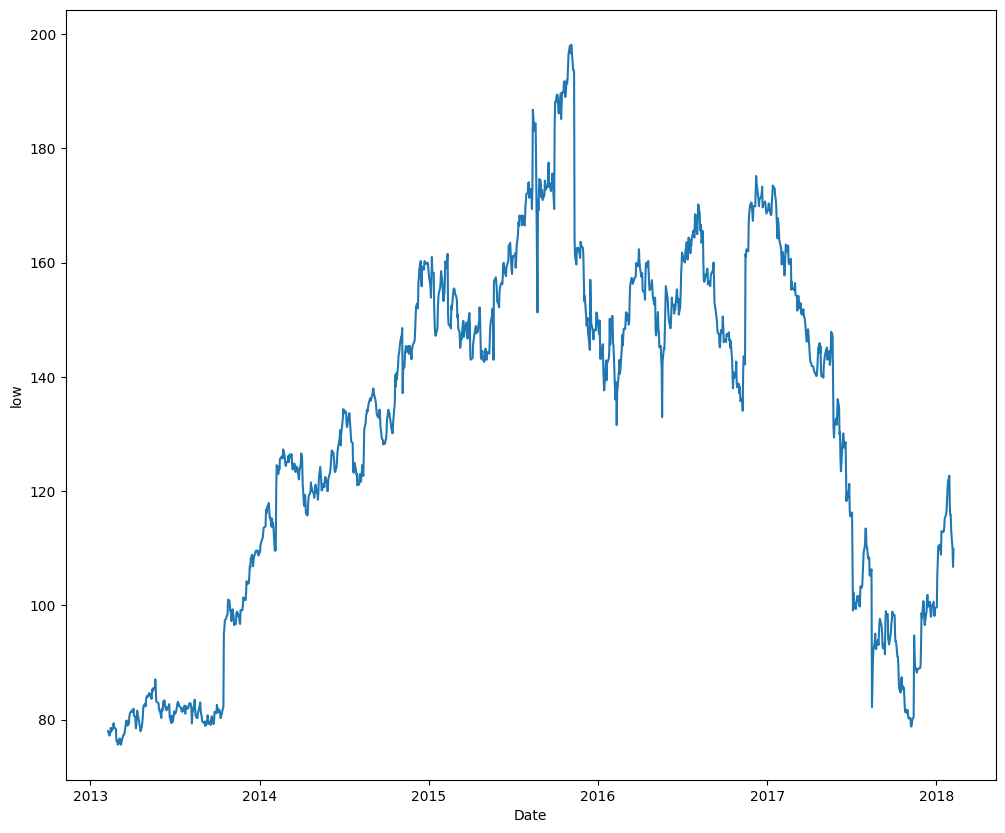

In [ ]:
plt.figure(figsize=(12, 10))
plt.xlabel("Date")
plt.ylabel("low")
plt.plot(df['low'])

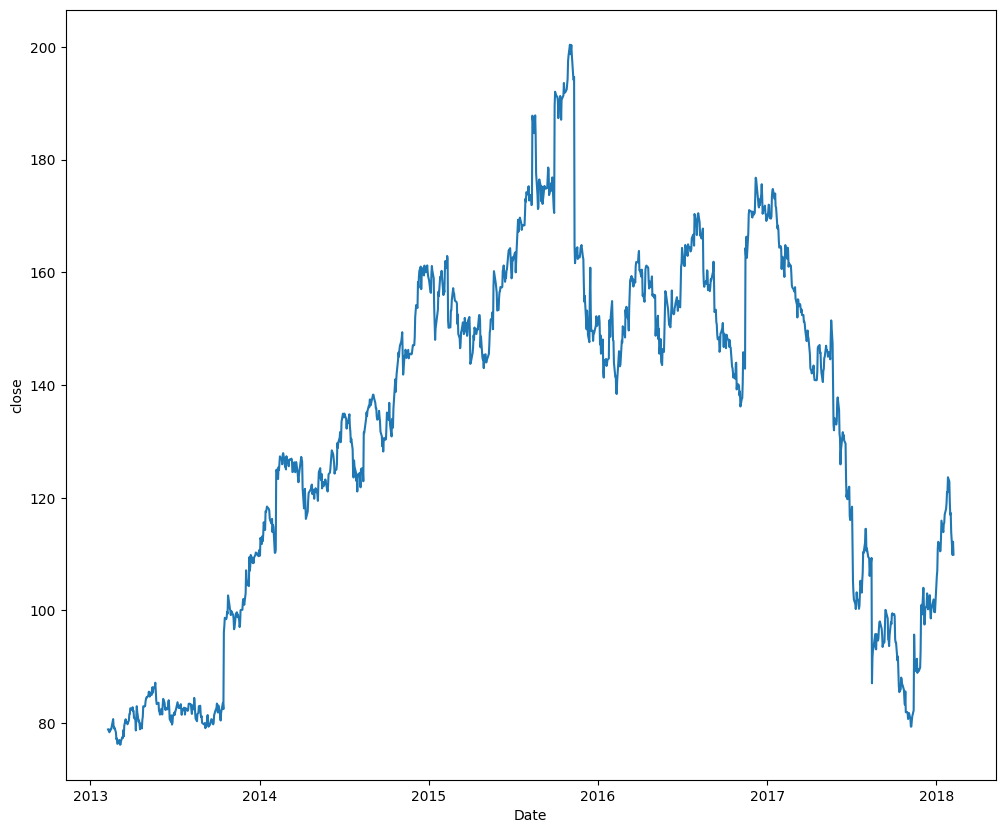

In [ ]:
plt.figure(figsize=(12, 10))
plt.xlabel("Date")
plt.ylabel("close")
plt.plot(df['close'])

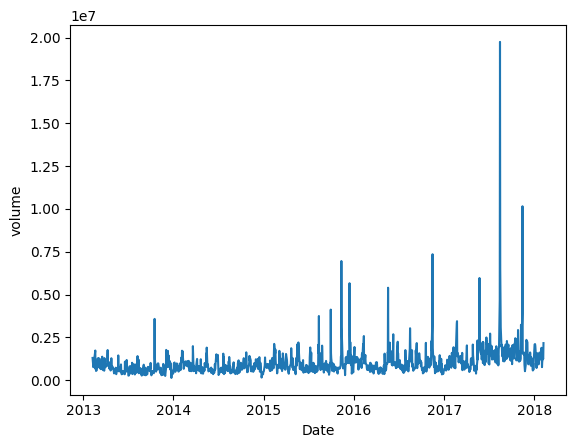

In [165]:
# plt.figure(figsize=(12, 10))
plt.xlabel("Date")
plt.ylabel("volume")
plt.plot(df['volume'])

In [ ]:
Q1 = df['volume'].quantile(0.25)
Q3 = df['volume'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR 
upper = Q3 + 1.5 * IQR
v = df['volume'][((df.volume < (lower))|(df.volume > (upper)))]

In [ ]:
v.iloc[4:41]

date
2014-02-06     3374211
2014-05-15     2247224
2014-08-14     2388112
2014-11-06     3398592
2015-02-12     4046068
2015-04-01     2423428
2015-05-21     4243659
2015-05-22     2200971
2015-07-08    14312381
2015-08-12     2967607
2015-08-13     3745812
2015-09-30     4119661
2015-11-12     6955577
2015-11-13     3092729
2015-12-15     5660269
2015-12-16     2638899
2015-12-18     2221597
2016-02-10     2203727
2016-02-11     2575686
2016-05-19     5397186
2016-05-26     2191670
2016-06-09     2680412
2016-06-27     2242523
2016-08-16     3030792
2016-09-12     2165299
2016-10-19     2178405
2016-11-10     2272028
2016-11-14     3409800
2016-11-15     7352943
2017-02-21     3286425
2017-02-22     3443098
2017-05-16     2320079
2017-05-23     3897489
2017-05-24     5964623
2017-05-25     3933558
2017-05-26     2250326
2017-06-06     2213019
Name: volume, dtype: int64

In [ ]:
print(df['volume'].loc['2013-08-08':'2013-08-14'].median())
df['volume'].loc['2013-08-08'] = df['volume'].loc['2013-08-08':'2013-08-14'].median()

df['volume'].loc['2013-10-16':'2013-10-22'].median()
df['volume'].loc['2013-10-16'] = df['volume'].loc['2013-10-16':'2013-10-22'].median()

df['volume'].loc['2013-11-26':'2013-12-02'].median()
df['volume'].loc['2013-11-26'] = df['volume'].loc['2013-11-26':'2013-12-02'].median()

df['volume'].loc['2013-11-26':'2013-12-02'].median()
df['volume'].loc['2013-11-26'] = df['volume'].loc['2013-11-26':'2013-12-02'].median()

df['volume'].loc['2014-02-06':'2014-02-12'].median()
df['volume'].loc['2014-02-06'] = df['volume'].loc['2014-02-06':'2014-02-12'].median()

df['volume'].loc['2014-05-15':'2014-05-21'].median()
df['volume'].loc['2014-05-15'] = df['volume'].loc['2014-05-15':'2014-05-21'].median()

df['volume'].loc['2014-08-14':'2014-08-20'].median()
df['volume'].loc['2014-08-14'] = df['volume'].loc['2014-08-14':'2014-08-20'].median()

df['volume'].loc['2014-11-06':'2014-11-12'].median()
df['volume'].loc['2014-11-06'] = df['volume'].loc['2014-11-06':'2014-11-12'].median()

df['volume'].loc['2015-02-12':'2015-02-18'].median()
df['volume'].loc['2015-02-12'] = df['volume'].loc['2015-02-12':'2015-02-18'].median()

df['volume'].loc['2015-04-01':'2015-04-07'].median()
df['volume'].loc['2015-04-01'] = df['volume'].loc['2015-04-01':'2015-04-07'].median()

df['volume'].loc['2015-05-21':'2015-05-27'].median()
df['volume'].loc['2015-05-21'] = df['volume'].loc['2015-05-21':'2015-05-27'].median()

df['volume'].loc['2015-07-08':'2015-07-14'].median()
df['volume'].loc['2015-07-08'] = df['volume'].loc['2015-07-08':'2015-07-14'].median()

df['volume'].loc['2015-08-12':'2015-08-18'].median()
df['volume'].loc['2015-08-12'] = df['volume'].loc['2015-08-12':'2015-08-18'].median()

df['volume'].loc['2015-08-12':'2015-08-18'].median()
df['volume'].loc['2015-08-12'] = df['volume'].loc['2015-08-12':'2015-08-18'].median()

#с 42 значения
df['volume'].loc['2017-06-20':'2017-06-26'].median()
df['volume'].loc['2017-06-20'] = df['volume'].loc['2017-06-20':'2017-06-26'].median()

df['volume'].loc['2017-06-29':'2017-07-05'].median()
df['volume'].loc['2017-06-29'] = df['volume'].loc['2017-06-29':'2017-07-05'].median()

df['volume'].loc['2017-07-05':'2017-07-11'].median()
df['volume'].loc['2017-07-05'] = df['volume'].loc['2017-07-05':'2017-07-11'].median()

df['volume'].loc['2017-07-13':'2017-07-19'].median()
df['volume'].loc['2017-07-13'] = df['volume'].loc['2017-07-13':'2017-07-19'].median()

df['volume'].loc['2017-07-18':'2017-07-24'].median()
df['volume'].loc['2017-07-18'] = df['volume'].loc['2017-07-18':'2017-07-24'].median()

df['volume'].loc['2017-07-27':'2017-08-02'].median()
df['volume'].loc['2017-07-27'] = df['volume'].loc['2017-07-27':'2017-08-02'].median()

df['volume'].loc['2017-08-14':'2017-08-20'].median()
df['volume'].loc['2017-08-14'] = df['volume'].loc['2017-08-14':'2017-08-20'].median()

df['volume'].loc['2017-09-07':'2017-09-13'].median()
df['volume'].loc['2017-09-07'] = df['volume'].loc['2017-09-07':'2017-09-13'].median()

df['volume'].loc['2017-09-15':'2017-09-21'].median()
df['volume'].loc['2017-09-15'] = df['volume'].loc['2017-09-15':'2017-09-21'].median()

df['volume'].loc['2017-09-19':'2017-09-25'].median()
df['volume'].loc['2017-09-19'] = df['volume'].loc['2017-09-19':'2017-09-25'].median()

df['volume'].loc['2017-09-25':'2017-10-01'].median()
df['volume'].loc['2017-09-25'] = df['volume'].loc['2017-09-25':'2017-10-01'].median()

df['volume'].loc['2017-10-04':'2017-10-10'].median()
df['volume'].loc['2017-10-04'] = df['volume'].loc['2017-10-04':'2017-10-10'].median()

df['volume'].loc['2017-10-12':'2017-10-18'].median()
df['volume'].loc['2017-10-12'] = df['volume'].loc['2017-10-12':'2017-10-18'].median()

df['volume'].loc['2017-10-18':'2017-10-24'].median()
df['volume'].loc['2017-10-18'] = df['volume'].loc['2017-10-18':'2017-10-24'].median()

df['volume'].loc['2017-10-26':'2017-11-01'].median()
df['volume'].loc['2017-10-26'] = df['volume'].loc['2017-10-26':'2017-11-01'].median()

df['volume'].loc['2017-10-30':'2017-11-05'].median()
df['volume'].loc['2017-10-30'] = df['volume'].loc['2017-10-30':'2017-11-05'].median()

df['volume'].loc['2017-11-08':'2017-11-14'].median()
df['volume'].loc['2017-11-08'] = df['volume'].loc['2017-11-08':'2017-11-14'].median()

df['volume'].loc['2017-11-15':'2017-11-21'].median()
df['volume'].loc['2017-11-15'] = df['volume'].loc['2017-11-15':'2017-11-21'].median()

df['volume'].loc['2017-11-16':'2017-11-22'].median()
df['volume'].loc['2017-11-16'] = df['volume'].loc['2017-11-16':'2017-11-22'].median()

df['volume'].loc['2017-11-29':'2017-12-05'].median()
df['volume'].loc['2017-11-29'] = df['volume'].loc['2017-11-29':'2017-12-05'].median()

df['volume'].loc['2017-12-05':'2017-12-11'].median()
df['volume'].loc['2017-12-05'] = df['volume'].loc['2017-12-05':'2017-12-11'].median()

df['volume'].loc['2017-12-12':'2017-12-18'].median()
df['volume'].loc['2017-12-12'] = df['volume'].loc['2017-12-12':'2017-12-18'].median()

df['volume'].loc['2018-01-02':'2018-01-08'].median()
df['volume'].loc['2018-01-02'] = df['volume'].loc['2018-01-02':'2018-01-08'].median()

df['volume'].loc['2018-02-07':'2018-02-13'].median()
df['volume'].loc['2018-02-07'] = df['volume'].loc['2018-02-07':'2018-02-13'].median()

1200805.0


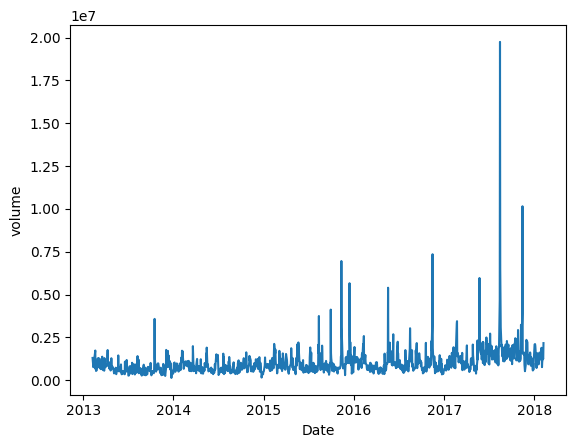

In [164]:
# plt.figure(figsize=(10, 8))
plt.xlabel("Date")
plt.ylabel("volume")
plt.plot(df['volume'])

In [ ]:
adfuller(df['open'])

(-1.85814495839199,
 0.35199978922049246,
 0,
 1258,
 {'1%': -3.4355588184378574,
  '5%': -2.8638402312881497,
  '10%': -2.5679946684494275},
 5751.5590869153275)

In [ ]:
df.iloc[:1007]

,open,high,low,close,volume
date,,,,,
2013-02-08,78.34,79.720,78.0100,78.90,1298137
2013-02-11,78.65,78.910,77.2300,78.39,758016
2013-02-12,78.39,78.630,77.5132,78.60,876859
2013-02-13,78.90,79.130,77.8500,78.97,1038574
2013-02-14,78.66,79.720,78.5850,78.84,1005376
...,...,...,...,...,...
2017-02-01,163.99,164.890,159.7000,160.59,1595047
2017-02-02,160.09,163.050,160.0000,162.34,1485466
2017-02-03,162.98,163.700,161.9200,162.75,850541


In [ ]:
train = df[:'2017-02-08']
test = df['2017-02-09':]

In [ ]:
len(train)

1006

In [ ]:
!pip install pmdarima
from pmdarima.arima import auto_arima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# model = auto_arima(df['open'], seasonal=True, m=12, trace=True)
# model.summary()

In [ ]:
# model = ARIMA(train['open'], order =(0,1,0)).fit()
# y_pred = model.predict(steps=251)
# y_pred

In [ ]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# mae = mean_absolute_error(train['open'], y_pred)
# mse = mean_squared_error(train['open'], y_pred)
# print('MAE: %.3f' % mae)
# print('MSE: %.3f' % mse)

Text(0, 0.5, 'open')

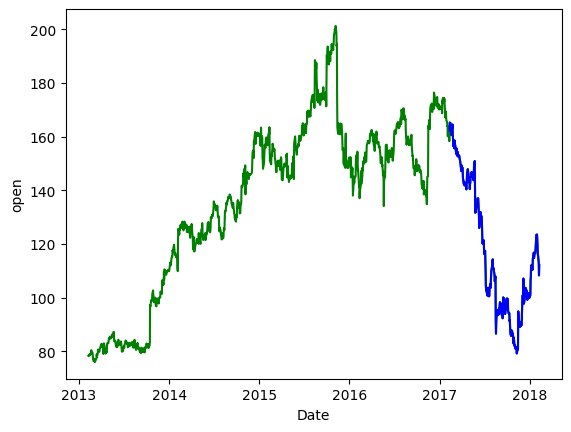

In [ ]:
plt.plot(df['open'], color='green')
plt.plot(test['open'], color='blue')
plt.xlabel("Date")
plt.ylabel("open")

In [153]:
model_open = ARIMA(df['open'], order=(0, 1, 0))
model_fit1 = model_open.fit()
pred_open = model_fit1.predict(start='2017-02-09', end='2018-02-07', steps=12)

forecast1 = model_fit1.forecast(steps=len(df['open']), alpha=0.05)
conf_int1 = model_fit1.conf_int()
print(pred_open)

date
2017-02-09    158.29
2017-02-10    162.26
2017-02-13    165.23
2017-02-14    165.00
2017-02-15    162.39
               ...  
2018-02-01    119.86
2018-02-02    116.24
2018-02-05    115.92
2018-02-06    113.05
2018-02-07    108.28
Name: predicted_mean, Length: 251, dtype: float64


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [154]:
with open('model.pickleOpen', 'wb') as f:
    pickle.dump(model_fit1, f)

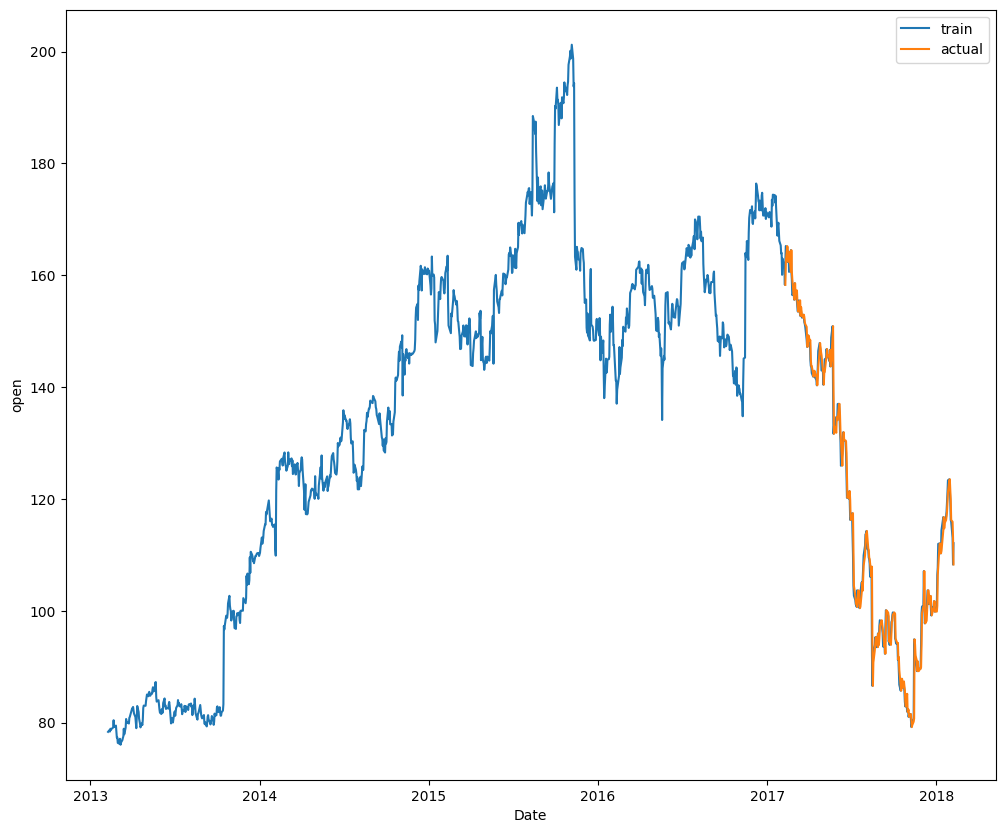

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(df['open'], label='train')
plt.plot(pred_open, label='actual')
plt.xlabel('Date')
plt.ylabel('open')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
mae = mean_absolute_error(df['open']['2017-02-09':'2018-02-07'], pred_open)
mse = mean_squared_error(df['open']['2017-02-09':'2018-02-07'], pred_open)
mape = mean_absolute_percentage_error(df['open']['2017-02-09':'2018-02-07'], pred_open) 
print('MAE: %.3f' % mae)
print('MSE: %.3f' % mse)
print('MAPE: %.3f' % mape)

MAE: 1.754
MSE: 6.862
MAPE: 0.016


In [ ]:
model_high = ARIMA(df['high'], order=(0, 1, 0))
model_fit2 = model_high.fit()
pred_high = model_fit2.predict(start='2017-02-09', end='2018-02-07', steps=12)

forecast2 = model_fit2.forecast(steps=len(df['high']), alpha=0.05)
conf_int2 = model_fit2.conf_int()
print(pred_high)

date
2017-02-09    163.65
2017-02-10    165.17
2017-02-13    165.87
2017-02-14    165.00
2017-02-15    164.79
               ...  
2018-02-01    120.47
2018-02-02    118.83
2018-02-05    117.18
2018-02-06    114.97
2018-02-07    113.11
Name: predicted_mean, Length: 251, dtype: float64


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [156]:
with open('model.pickleHigh', 'wb') as f:
    pickle.dump(model_fit2, f)

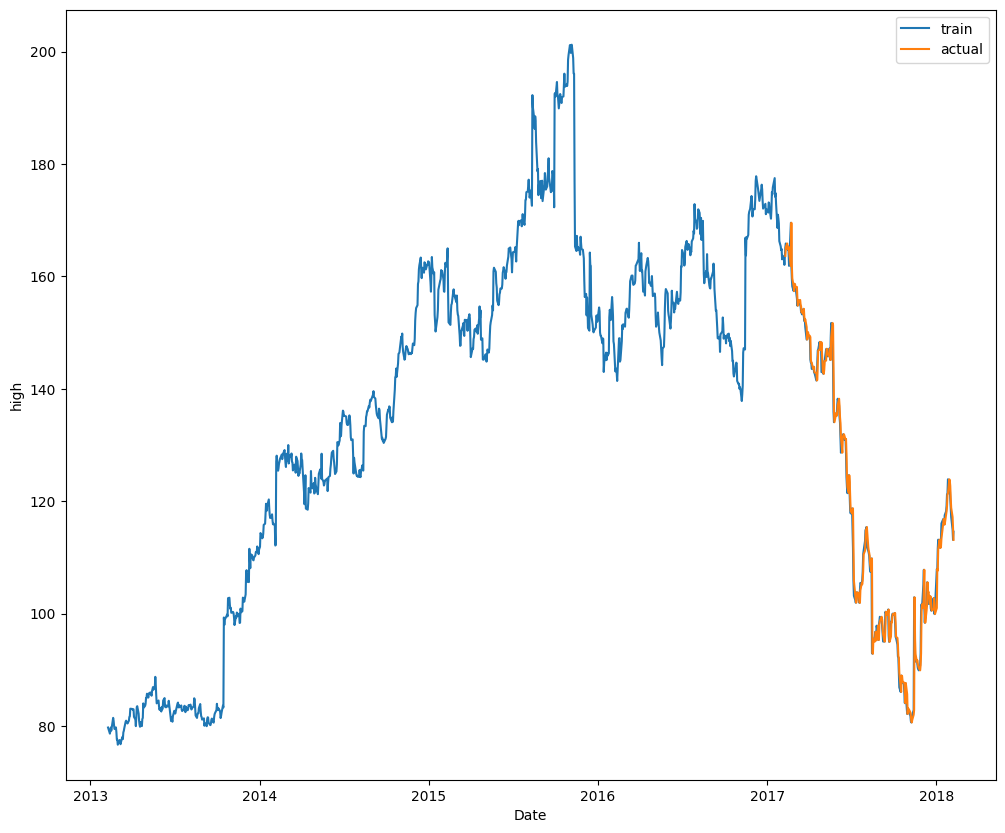

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(df['high'], label='train')
plt.plot(pred_high, label='actual')
plt.xlabel('Date')
plt.ylabel('high')
plt.legend()
plt.show()

In [ ]:
mae2 = mean_absolute_error(df['high']['2017-02-09':'2018-02-07'], pred_high)
mse2 = mean_squared_error(df['high']['2017-02-09':'2018-02-07'], pred_high)
mape2 = mean_absolute_percentage_error(df['high']['2017-02-09':'2018-02-07'], pred_high) 
print('MAE: %.3f' % mae2)
print('MSE: %.3f' % mse2)
print('MAPE: %.3f' % mape2)

MAE: 1.613
MSE: 7.277
MAPE: 0.014


In [ ]:
model_low = ARIMA(df['low'], order=(0, 1, 0))
model_fit3 = model_low.fit()
pred_low = model_fit3.predict(start='2017-02-09', end='2018-02-07', steps=12)

forecast3 = model_fit3.forecast(steps=len(df['low']), alpha=0.05)
conf_int3 = model_fit3.conf_int()
print(pred_low)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


date
2017-02-09    158.255
2017-02-10    161.310
2017-02-13    163.190
2017-02-14    162.150
2017-02-15    161.850
               ...   
2018-02-01    115.825
2018-02-02    115.830
2018-02-05    113.125
2018-02-06    109.810
2018-02-07    106.745
Name: predicted_mean, Length: 251, dtype: float64


In [161]:
with open('model.pickleLow', 'wb') as f:
    pickle.dump(model_fit3, f)

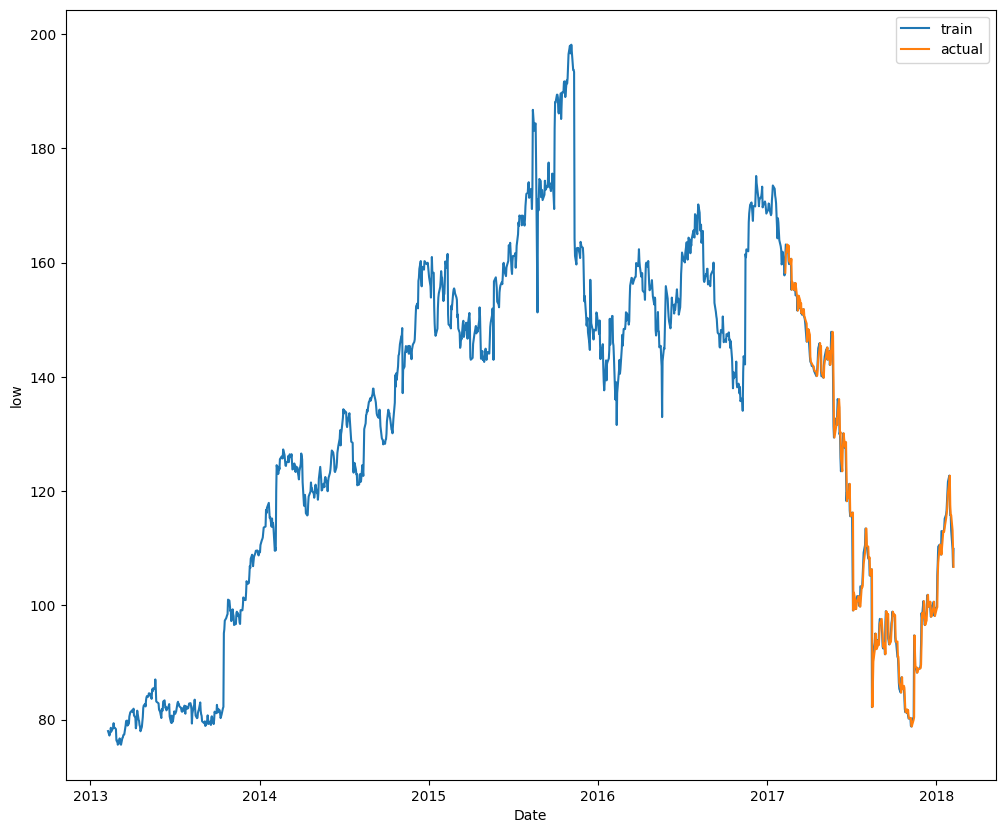

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(df['low'], label='train')
plt.plot(pred_low, label='actual')
plt.xlabel('Date')
plt.ylabel('low')
plt.legend()
plt.show()

In [ ]:
mae3 = mean_absolute_error(df['low']['2017-02-09':'2018-02-07'], pred_low)
mse3 = mean_squared_error(df['low']['2017-02-09':'2018-02-07'], pred_low)
mape3 = mean_absolute_percentage_error(df['low']['2017-02-09':'2018-02-07'], pred_low) 
print('MAE: %.3f' % mae3)
print('MSE: %.3f' % mse3)
print('MAPE: %.3f' % mape3)

MAE: 1.657
MSE: 8.272
MAPE: 0.015


In [ ]:
model_close = ARIMA(df['close'], order=(0, 1, 0))
model_fit4 = model_close.fit()
pred_close = model_fit4.predict(start='2017-02-09', end='2018-02-07', steps=12)

forecast4 = model_fit4.forecast(steps=len(df['close']), alpha=0.05)
conf_int4 = model_fit4.conf_int()
print(pred_close)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


date
2017-02-09    162.73
2017-02-10    164.83
2017-02-13    164.05
2017-02-14    162.39
2017-02-15    164.37
               ...  
2018-02-01    116.99
2018-02-02    117.29
2018-02-05    113.93
2018-02-06    109.86
2018-02-07    112.20
Name: predicted_mean, Length: 251, dtype: float64


In [160]:
with open('model.pickleClose', 'wb') as f:
    pickle.dump(model_fit4, f)

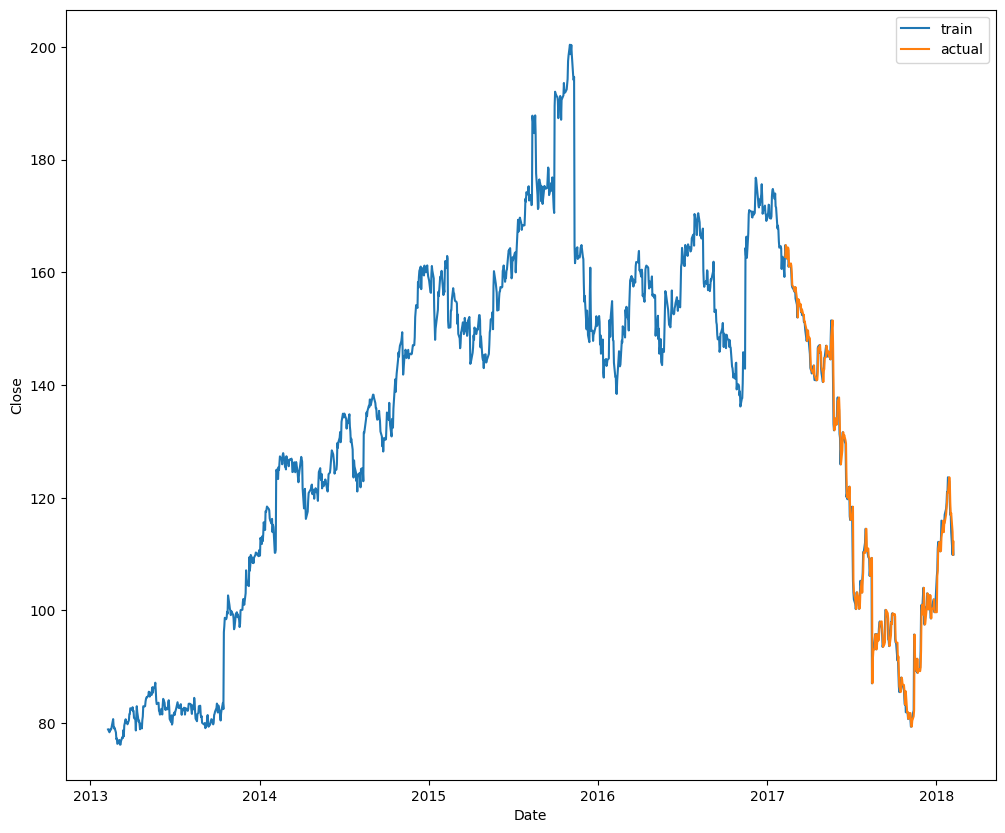

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(df['close'], label='train')
plt.plot(pred_close, label='actual')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()

In [ ]:
mae4 = mean_absolute_error(df['close']['2017-02-09':'2018-02-07'], pred_close)
mse4 = mean_squared_error(df['close']['2017-02-09':'2018-02-07'], pred_close)
mape4 = mean_absolute_percentage_error(df['close']['2017-02-09':'2018-02-07'], pred_close) 
print('MAE: %.3f' % mae4)
print('MSE: %.3f' % mse4)
print('MAPE: %.3f' % mape4)

MAE: 1.700
MSE: 7.542
MAPE: 0.015


In [ ]:
model_volume = ARIMA(df['volume'], order=(0, 1, 0))
model_fit5 = model_volume.fit()
pred_volume = model_fit5.predict(start='2017-02-09', end='2018-02-07', steps=12)

forecast5 = model_fit5.forecast(steps=len(df['volume']), alpha=0.05)
conf_int5 = model_fit5.conf_int()
print(pred_volume)

date
2017-02-09    1921974.0
2017-02-10    1101988.0
2017-02-13     735041.0
2017-02-14     986197.0
2017-02-15     935270.0
                ...    
2018-02-01    1235733.0
2018-02-02     760629.0
2018-02-05    1092333.0
2018-02-06    1281592.0
2018-02-07    1240784.0
Name: predicted_mean, Length: 251, dtype: float64


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


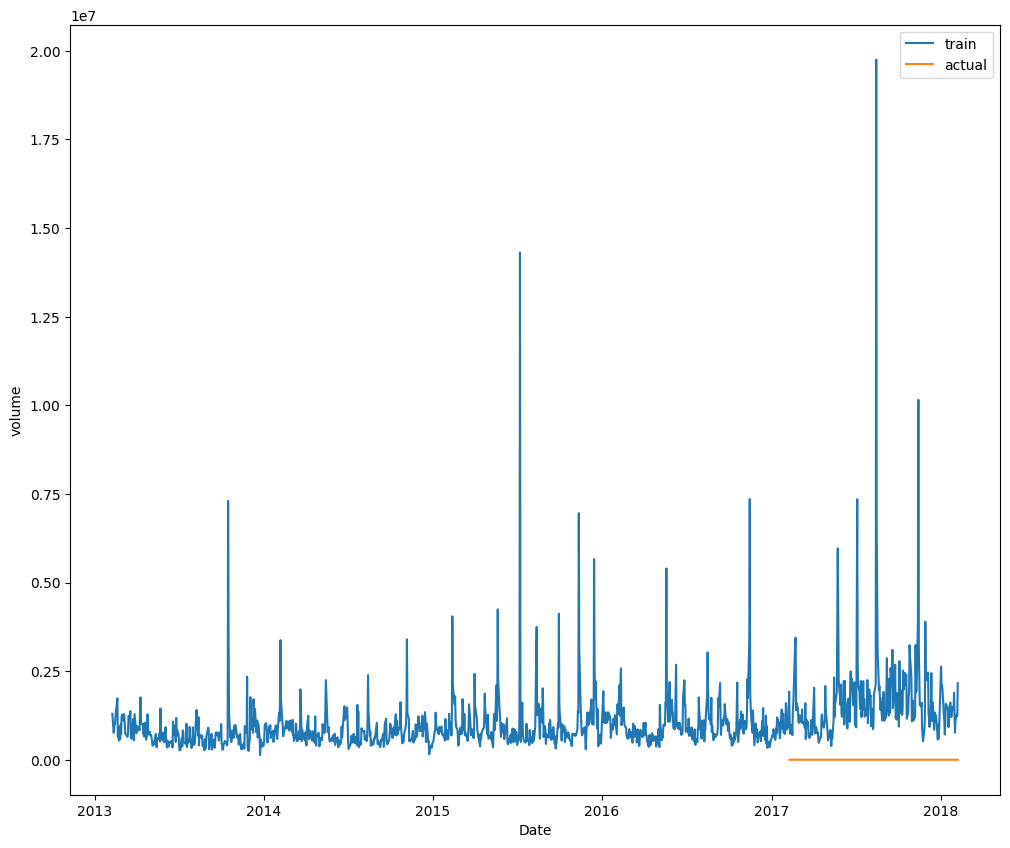

In [ ]:
# plt.figure(figsize=(12,10))
# plt.plot(df['volume'], label='train')
# plt.plot(pred_close, label='actual')
# plt.xlabel('Date')
# plt.ylabel('volume')
# plt.legend()
# plt.show()